In [2]:
#Kernel → Change kernel → Python (tfenv)


In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [9]:
!pip install pandas numpy matplotlib scikit-learn tensorflow

In [12]:
!pip install seaborn

C:\Users\shres\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.3361 - loss: 2.2249 - val_accuracy: 0.8126 - val_loss: 0.5624
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8763 - loss: 0.3883 - val_accuracy: 0.8933 - val_loss: 0.3090
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9491 - loss: 0.1651 - val_accuracy: 0.9209 - val_loss: 0.2805
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9774 - loss: 0.0811 - val_accuracy: 0.9074 - val_loss: 0.3025
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9844 - loss: 0.0539 - val_accuracy: 0.9215 - val_loss: 0.2671
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9888 - loss: 0.0388 - val_accuracy: 0.9264 - val_loss: 0.2748
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9909 - loss: 0.0309 - val_accuracy: 0.9267 - val_loss: 0.2531
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9936 - loss: 0.0230 - val_ac

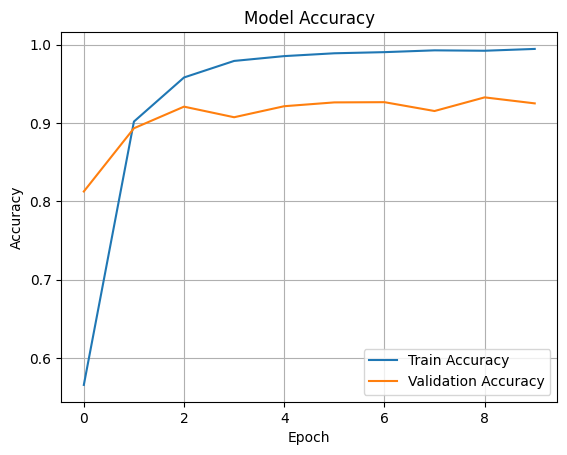

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


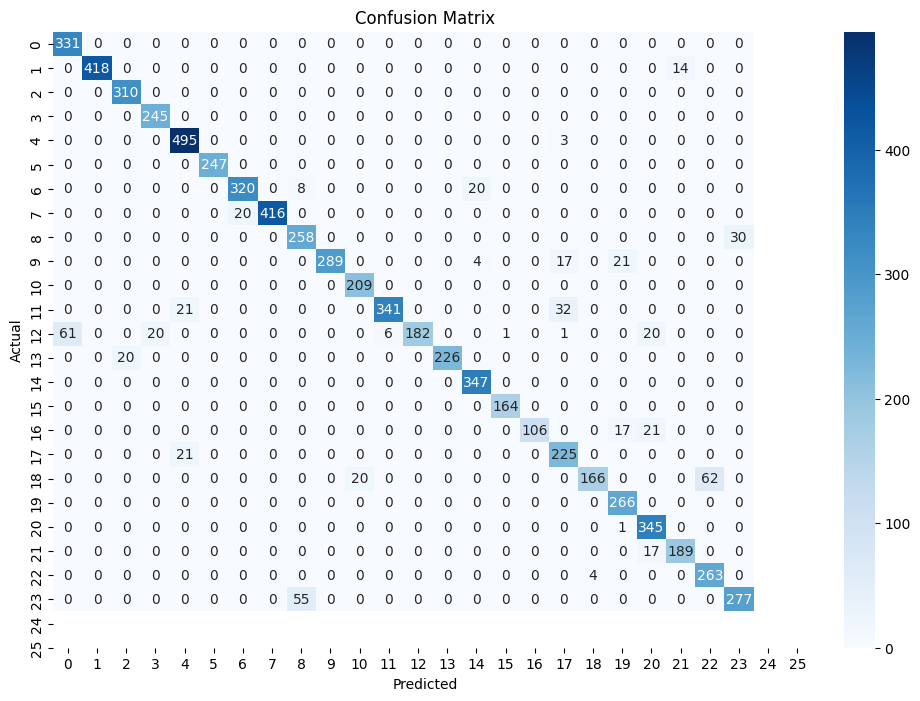


Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       331
           1       1.00      0.97      0.98       432
           2       0.94      1.00      0.97       310
           3       0.92      1.00      0.96       245
           4       0.92      0.99      0.96       498
           5       1.00      1.00      1.00       247
           6       0.94      0.92      0.93       348
           7       1.00      0.95      0.98       436
           8       0.80      0.90      0.85       288
          10       1.00      0.87      0.93       331
          11       0.91      1.00      0.95       209
          12       0.98      0.87      0.92       394
          13       1.00      0.63      0.77       291
          14       1.00      0.92      0.96       246
          15       0.94      1.00      0.97       347
          16       0.99      1.00      1.00       164
          17       1.00      0.74      0.85       144
  

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load CSV files from local path (update path if needed)
train_path = r"C:\Users\shres\Downloads\archive11\sign_mnist_train.csv"
test_path  = r"C:\Users\shres\Downloads\archive11\sign_mnist_test.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# Preprocess the data
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(train_df['label'], num_classes=26)

X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_test = to_categorical(test_df['label'], num_classes=26)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # 26 sign classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {accuracy * 100:.2f}%")

#  Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#  Optional: Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(26)), yticklabels=list(range(26)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))
